In [4]:
import xarray as xr
import holoviews as hv
import geoviews as gv
import cmocean
import cmocean.cm as cmo
import matplotlib.pyplot as plt
from holoviews import opts
# from holoviews.operation.datashader import datashade, shade, dynspread, rasterize
import numpy as np
import pandas as pd
import pyfesom2 as pf
import cartopy.crs as crs
import cartopy.crs as ccrs
import matplotlib.cm as cm
import hvplot.xarray
hv.extension("bokeh")

ImportError: Numba needs NumPy 1.21 or less

In [2]:
mesh_PI = pf.load_mesh('/home/ollie/pgierz/For_Umesh/plotting/LCORE_MESH/', abg=[50, 15, -90])
mesh_ts02 = pf.load_mesh('/work/ollie/udubey/FESOM_2_0_MESH_PART/manual_partioning/fmesh_part_ts02/mesh_CORE2_TS02/', abg=[0, 0, 0], usepickle=False)
mesh_ts04 = pf.load_mesh('/work/ollie/udubey/FESOM_2_0_MESH_PART/manual_partioning/fmesh_part_ts04/mesh_CORE2_TS04/', abg=[0, 0, 0], usepickle=False)

/home/ollie/pgierz/For_Umesh/plotting/LCORE_MESH/pickle_mesh_py3_fesom2
The usepickle == True)
The pickle file for FESOM2 exists.
The mesh will be loaded from /home/ollie/pgierz/For_Umesh/plotting/LCORE_MESH/pickle_mesh_py3_fesom2
Load 2d part of the mesh in 1 second(s)
Load 2d part of the mesh in 1 second(s)


In [3]:
a_ice_PI = xr.open_dataset("/work/ollie/udubey/AWIESM_2_1/experiments/PI_CTRL/analysis/fesom/PI_CTRL_a_ice_fesom_interpolated_2000-2200.nc", decode_times=False)
a_ice_45 = xr.open_dataset("/work/ollie/udubey/AWIESM_2_1/experiments/45_Full/analysis/fesom/45_Full_a_ice_fesom_interpolated_2900-3000.nc", decode_times=False)
a_ice_57 = xr.open_dataset("/work/ollie/udubey/AWIESM_2_1/experiments/57.5_Full/analysis/fesom/57.5_Full_a_ice_fesom_interpolated_2900-3000.nc", decode_times=False)

In [4]:
a_ice_45.a_ice.squeeze()

<xarray.DataArray 'a_ice' (time: 1212, lat: 170, lon: 360)>
[74174400 values with dtype=float64]
Coordinates:
  * time         (time) float64 3.653e+05 3.653e+05 ... 4.021e+05 4.021e+05
    depth_coord  float64 0.0
  * lat          (lat) float64 -80.0 -78.99 -77.99 -76.98 ... 87.99 88.99 90.0
  * lon          (lon) float64 -180.0 -179.0 -178.0 -177.0 ... 178.0 179.0 180.0
Attributes:
    description:  ice concentration
    units:        %

In [5]:
a_ice_PI['time']= range(0, len(a_ice_PI.a_ice))
a_ice_57['time']= range(0, len(a_ice_57.a_ice))
a_ice_45['time']= range(0, len(a_ice_45.a_ice))

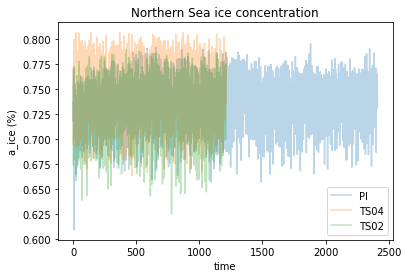

In [6]:
f , axm = plt.subplots(1,1) 
(a_ice_PI.a_ice.squeeze()
 #.where(a_ice_PI.lat > 40)
 #.where(a_ice_pi.lat < -40)
 .mean(dim=("lon", "lat")).plot(ax=axm, label="PI", alpha=0.3))

(a_ice_45.a_ice.squeeze()
 #.where(a_ice_45.lat > 40)
 #.where(a_ice_tspi.lat < -40)
 .mean(dim=("lon", "lat")).plot(ax=axm, label="TS04", alpha=0.3))

(a_ice_57.a_ice.squeeze()
 #.where(a_ice_57.lat > 40)
 #.where(a_ice_tspi.lat < -40)
 .mean(dim=("lon", "lat")).plot(ax=axm, label="TS02", alpha=0.3))
plt.title("Northern Sea ice concentration")
plt.ylabel("a_ice (%)")
plt.legend() 

In [7]:
def plot_holoviews(mesh, data, wireframe=False, cmap=None, proj='pc', data_name='data'):
    
    elem2 = mesh.elem[mesh.no_cyclic_elem]
    data = np.ma.masked_equal(data, 0)
    
    verts = pd.DataFrame({'Longitudes':mesh.x2, 'Latitudes':mesh.y2, 'data':data})
    tris = pd.DataFrame({'v0':elem2[:,0],'v1':elem2[:,1], 'v2':elem2[:,2]})
    fesom_mesh = gv.TriMesh((tris, verts), crs=crs.PlateCarree())
    if wireframe:
        verts2 = pd.DataFrame({'Longitudes':mesh.x2, 'Latitudes':mesh.y2})
        trimesh = gv.TriMesh((tris, verts2), crs=crs.PlateCarree())
        wireframe_plot = datashade(trimesh, interpolation=None, cmap=['black'])
    
    if proj == 'pc':
        projection=crs.PlateCarree()
        width=800,
        height=500,
        y_range=(-80,90)
    elif proj == 'np':
        projection=crs.NorthPolarStereo()
        width = 500,
        height = 500,
        y_range=(60,90)
    elif proj == 'sp':
        projection=crs.SouthPolarStereo()
        width = 500,
        height = 500,
        y_range=(-90,-30)
    
    if cmap is None:
        cmap=cm.Spectral_r
        
    main_plot = rasterize(fesom_mesh, interpolation=None, y_range=y_range).opts(
                        tools=["hover"],
                        width=width[0],
                        height=height[0],
                        projection=projection,
                        colorbar=True,
                        cmap=cmap,
                        colorbar_position="bottom",
                        clabel="Resolution",
                        fontscale=1.3
                    )
    if wireframe:
        return main_plot * gv.feature.coastline() * wireframe_plot
    else:
        return main_plot * gv.feature.coastline()

In [8]:
a_ice_45_PI = xr.open_dataset("/work/ollie/udubey/AWIESM_2_1/experiments/45_Full/analysis/fesom/45_Full_sub_PI_fesom_a_ice_interpolated_2900-3000_PI200.nc", decode_times=False)
a_ice_57_PI = xr.open_dataset("/work/ollie/udubey/AWIESM_2_1/experiments/57.5_Full/analysis/fesom/57.5_Full_sub_PI_fesom_a_ice_interpolated_2900-3000_PI200.nc", decode_times=False)

In [9]:
a_ice_45_PI["time"] = xr.cftime_range(start="1950-01-01", freq="M", periods=len(a_ice_45_PI['time']))
#a_ice_45_PI_end = a_ice_45_PI.isel(time=slice(-100*12-1, -1))
a_ice_45_PI_seasons = a_ice_45_PI.groupby("time.month").mean()
print(a_ice_45_PI_seasons)

<xarray.Dataset>
Dimensions:      (depth_coord: 1, lat: 170, lon: 360, month: 12)
Coordinates:
  * lon          (lon) float64 -180.0 -179.0 -178.0 -177.0 ... 178.0 179.0 180.0
  * lat          (lat) float64 -80.0 -78.99 -77.99 -76.98 ... 87.99 88.99 90.0
  * depth_coord  (depth_coord) float64 0.0
  * month        (month) int64 1 2 3 4 5 6 7 8 9 10 11 12
Data variables:
    a_ice        (month, depth_coord, lat, lon) float64 nan nan ... nan 0.002393


In [10]:
a_ice_45["time"] = xr.cftime_range(start="1950-01-01", freq="M", periods=len(a_ice_45['time']))
a_ice_45_end = a_ice_45.isel(time=slice(-100*12-1, -1))
a_ice_45_seasons = a_ice_45_end.groupby("time.month").mean()

In [11]:
a_ice_57_PI["time"] = xr.cftime_range(start="1950-01-01", freq="M", periods=len(a_ice_57_PI['time']))
#a_ice_57_PI_end = a_ice_57_PI.isel(time=slice(-100*12-1, -1))
a_ice_57_PI_seasons = a_ice_57_PI.groupby("time.month").mean()

In [12]:
a_ice_57["time"] = xr.cftime_range(start="1950-01-01", freq="M", periods=len(a_ice_57['time']))
a_ice_57_end = a_ice_57.isel(time=slice(-100*12-1, -1))
a_ice_57_seasons = a_ice_57_end.groupby("time.month").mean()

In [13]:
a_ice_PI["time"] = xr.cftime_range(start="1950-01-01", freq="M", periods=len(a_ice_PI['time']))
a_ice_PI_end = a_ice_PI.isel(time=slice(-30*12-1, -1))
a_ice_PI_seasons = a_ice_PI_end.groupby("time.month").mean()

In [14]:
a_ice_PI_seasons

<xarray.Dataset>
Dimensions:      (depth_coord: 1, lat: 170, lon: 360, month: 12)
Coordinates:
  * depth_coord  (depth_coord) float64 0.0
  * lat          (lat) float64 -80.0 -78.99 -77.99 -76.98 ... 87.99 88.99 90.0
  * lon          (lon) float64 -180.0 -179.0 -178.0 -177.0 ... 178.0 179.0 180.0
  * month        (month) int64 1 2 3 4 5 6 7 8 9 10 11 12
Data variables:
    a_ice        (month, depth_coord, lat, lon) float64 nan nan ... nan 0.9909

In [15]:
summer_a_ice_45_jja = a_ice_45_seasons.sel(month=9)
summer_a_ice_57_jja = a_ice_57_seasons.sel(month=9)
summer_a_ice_PI_jja = a_ice_PI_seasons.sel(month=9)
summer_a_ice_45_PI_jja = a_ice_45_PI_seasons.sel(month=9)
summer_a_ice_57_PI_jja = a_ice_57_PI_seasons.sel(month=9)

In [16]:
winter_a_ice_45_djf = a_ice_45_seasons.sel(month=3)
winter_a_ice_57_djf = a_ice_57_seasons.sel(month=3)
winter_a_ice_PI_djf = a_ice_PI_seasons.sel(month=3)
winter_a_ice_45_PI_djf = a_ice_45_PI_seasons.sel(month=3)
winter_a_ice_57_PI_djf = a_ice_57_PI_seasons.sel(month=3)

In [17]:
winter_a_ice_45_djf

<xarray.Dataset>
Dimensions:      (depth_coord: 1, lat: 170, lon: 360)
Coordinates:
  * depth_coord  (depth_coord) float64 0.0
  * lat          (lat) float64 -80.0 -78.99 -77.99 -76.98 ... 87.99 88.99 90.0
  * lon          (lon) float64 -180.0 -179.0 -178.0 -177.0 ... 178.0 179.0 180.0
    month        int64 3
Data variables:
    a_ice        (depth_coord, lat, lon) float64 0.7691 0.7366 ... nan 0.9945

In [27]:
#.where(summer_a_ice_45_jja.a_ice > 0.1)

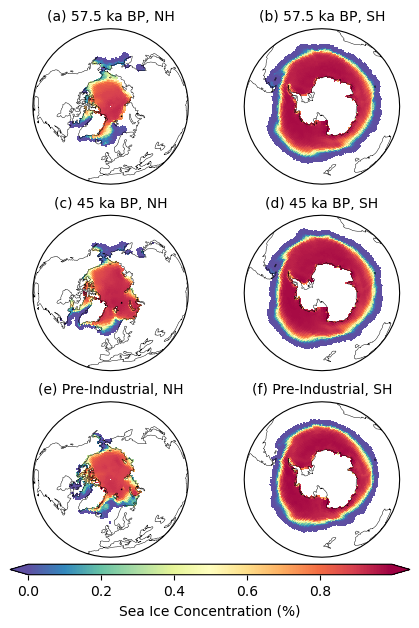

In [28]:
f = plt.figure(dpi=100, figsize=(5, 7))

ax_north_57 = f.add_subplot(3, 2, 1, projection=ccrs.NearsidePerspective(0, 90))
ax_south_57 = f.add_subplot(3, 2, 2, projection=ccrs.NearsidePerspective(0, -90))

ax_north_45 = f.add_subplot(3, 2, 3, projection=ccrs.NearsidePerspective(0, 90))
ax_south_45 = f.add_subplot(3, 2, 4, projection=ccrs.NearsidePerspective(0, -90))

ax_north_pi = f.add_subplot(3, 2, 5, projection=ccrs.NearsidePerspective(0, 90))
ax_south_pi = f.add_subplot(3, 2, 6, projection=ccrs.NearsidePerspective(0, -90))

for ax in ax_north_57, ax_south_57, ax_north_45, ax_south_45, ax_north_pi, ax_south_pi:
    ax.coastlines(lw=0.33)
    
summer_a_ice_57_jja_da = summer_a_ice_57_jja.squeeze().a_ice
summer_a_ice_57_jja_da.plot(ax=ax_north_57, transform=ccrs.PlateCarree(), add_labels=False, add_colorbar=False, cmap=plt.cm.Spectral_r)
art = summer_a_ice_57_jja_da.plot(ax=ax_south_57, transform=ccrs.PlateCarree(), add_labels=False, add_colorbar=False, cmap=plt.cm.Spectral_r)

summer_a_ice_45_jja_da = summer_a_ice_45_jja.squeeze().a_ice
summer_a_ice_45_jja_da.plot(ax=ax_north_45, transform=ccrs.PlateCarree(), add_labels=False, add_colorbar=False, cmap=plt.cm.Spectral_r)
summer_a_ice_45_jja_da.plot(ax=ax_south_45, transform=ccrs.PlateCarree(), add_labels=False, add_colorbar=False, cmap=plt.cm.Spectral_r)

summer_a_ice_pi_jja_da = summer_a_ice_PI_jja.squeeze().a_ice
summer_a_ice_pi_jja_da.plot(ax=ax_north_pi, transform=ccrs.PlateCarree(), add_labels=False, add_colorbar=False, cmap=plt.cm.Spectral_r)
summer_a_ice_pi_jja_da.plot(ax=ax_south_pi, transform=ccrs.PlateCarree(), add_labels=False, add_colorbar=False, cmap=plt.cm.Spectral_r)


cax = f.add_axes([0.1, 0.1, 0.8, 0.015])
plt.colorbar(art, cax=cax, orientation="horizontal", extend="both", label="Sea Ice Concentration (%)")

ax_north_57.set_title("(a) 57.5 ka BP, NH", size=10)
ax_north_45.set_title("(c) 45 ka BP, NH", size=10)
ax_north_pi.set_title("(e) Pre-Industrial, NH", size=10)

ax_south_57.set_title("(b) 57.5 ka BP, SH", size=10)
ax_south_45.set_title("(d) 45 ka BP, SH", size=10)
ax_south_pi.set_title("(f) Pre-Industrial, SH", size=10)

f.tight_layout()

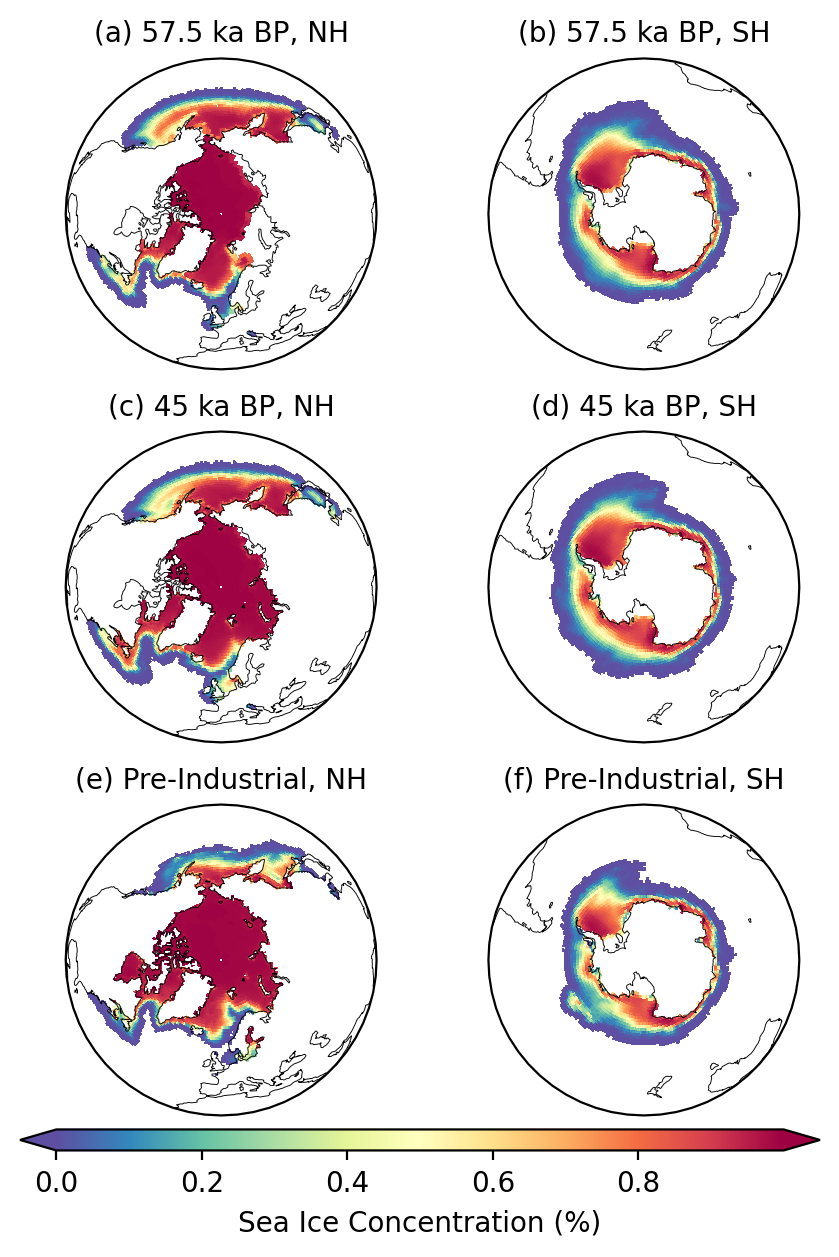

In [20]:
f = plt.figure(dpi=200, figsize=(5, 7))

ax_north_57 = f.add_subplot(3, 2, 1, projection=ccrs.NearsidePerspective(0, 90))
ax_south_57 = f.add_subplot(3, 2, 2, projection=ccrs.NearsidePerspective(0, -90))

ax_north_45 = f.add_subplot(3, 2, 3, projection=ccrs.NearsidePerspective(0, 90))
ax_south_45 = f.add_subplot(3, 2, 4, projection=ccrs.NearsidePerspective(0, -90))

ax_north_pi = f.add_subplot(3, 2, 5, projection=ccrs.NearsidePerspective(0, 90))
ax_south_pi = f.add_subplot(3, 2, 6, projection=ccrs.NearsidePerspective(0, -90))

for ax in ax_north_57, ax_south_57, ax_north_45, ax_south_45, ax_north_pi, ax_south_pi:
    ax.coastlines(lw=0.33)
    
winter_a_ice_57_djf_da = winter_a_ice_57_djf.squeeze().a_ice
winter_a_ice_57_djf_da.plot(ax=ax_north_57, transform=ccrs.PlateCarree(), add_labels=False, add_colorbar=False, cmap=plt.cm.Spectral_r)
art = winter_a_ice_57_djf_da.plot(ax=ax_south_57, transform=ccrs.PlateCarree(), add_labels=False, add_colorbar=False, cmap=plt.cm.Spectral_r)

winter_a_ice_45_djf_da = winter_a_ice_45_djf.squeeze().a_ice
winter_a_ice_45_djf_da.plot(ax=ax_north_45, transform=ccrs.PlateCarree(), add_labels=False, add_colorbar=False, cmap=plt.cm.Spectral_r)
winter_a_ice_45_djf_da.plot(ax=ax_south_45, transform=ccrs.PlateCarree(), add_labels=False, add_colorbar=False, cmap=plt.cm.Spectral_r)

winter_a_ice_pi_djf_da = winter_a_ice_PI_djf.squeeze().a_ice
winter_a_ice_pi_djf_da.plot(ax=ax_north_pi, transform=ccrs.PlateCarree(), add_labels=False, add_colorbar=False, cmap=plt.cm.Spectral_r)
winter_a_ice_pi_djf_da.plot(ax=ax_south_pi, transform=ccrs.PlateCarree(), add_labels=False, add_colorbar=False, cmap=plt.cm.Spectral_r)


cax = f.add_axes([0.1, 0.1, 0.8, 0.015])
plt.colorbar(art, cax=cax, orientation="horizontal", extend="both", label="Sea Ice Concentration (%)")

ax_north_57.set_title("(a) 57.5 ka BP, NH", size=10)
ax_north_45.set_title("(c) 45 ka BP, NH", size=10)
ax_north_pi.set_title("(e) Pre-Industrial, NH", size=10)

ax_south_57.set_title("(b) 57.5 ka BP, SH", size=10)
ax_south_45.set_title("(d) 45 ka BP, SH", size=10)
ax_south_pi.set_title("(f) Pre-Industrial, SH", size=10)

f.tight_layout()

In [21]:
uijnkctvuyihb jl

SyntaxError: invalid syntax (<ipython-input-21-5e196953a573>, line 1)

In [ ]:
plot_a_ice_45_PI_winter = winter_a_ice_45_PI_djf.squeeze().hvplot.quadmesh(
    x="lon",
    y="lat",  
    projection=ccrs.PlateCarree(),
    coastline=True,
    title="(d) 45 ka BP - PI (March)",
    clim=(-0.8, 0.8),
    cmap=cmocean.cm.balance)

plot_a_ice_57_PI_winter = winter_a_ice_57_PI_djf.squeeze().hvplot.quadmesh(
    x="lon",
    y="lat", 
    projection=ccrs.PlateCarree(),
    coastline=True,
    title="(c) 57.5 ka BP - PI (March)",
    clim=(-0.8, 0.8),
    cmap=cmocean.cm.balance)


In [ ]:
plot_a_ice_45_PI_summer = summer_a_ice_45_PI_jja.squeeze().hvplot.quadmesh(
    x="lon",
    y="lat",  
    projection=ccrs.PlateCarree(),
    coastline=True,
    title="(f) 45 ka BP - PI (September)",
    clim=(-0.8, 0.8),
    cmap=cmocean.cm.balance)

plot_a_ice_57_PI_summer = summer_a_ice_57_PI_jja.squeeze().hvplot.quadmesh(
    x="lon",
    y="lat", 
    projection=ccrs.PlateCarree(),
    coastline=True,
    title="(e) 57.5 ka BP - PI (September)",
    clim=(-0.8, 0.8),
    cmap=cmocean.cm.balance)


In [ ]:
(plot_a_ice_45_PI_winter + plot_a_ice_57_PI_winter + plot_a_ice_45_PI_summer + plot_a_ice_57_PI_summer).cols(2)

In [ ]:
import cartopy
cartopy.__version__

In [ ]:
timmean_a_ice_45_PI = a_ice_45_PI.mean(dim="time").hvplot.quadmesh(
    x="lon",
    y="lat", 
    title="(b) 45 ka BP - PI (annual)",
    projection=ccrs.PlateCarree(),
    coastline=True,
    clim= (-0.8, 0.8),
    cmap=cmocean.cm.balance)

timmean_a_ice_57_PI = a_ice_57_PI.mean(dim="time").hvplot.quadmesh(
    x="lon",
    y="lat", 
    title="(a) 57.5 ka BP - PI (annual)",
    projection=ccrs.PlateCarree(),
    coastline=True,
    clim= (-0.8, 0.8),
    cmap=cmocean.cm.balance)

In [ ]:
timmean_a_ice_45_PI + timmean_a_ice_57_PI

In [ ]:
summer_a_ice_45 = summer_a_ice_45_jja.a_ice.hvplot.quadmesh(
    x="lon",
    y="lat", 
    title="(h) 45 ka BP (September)",
    projection=ccrs.PlateCarree(),
    coastline=True,
    clim=(0, 1),
    cmap=cmocean.cm.balance)

summer_a_ice_57 = summer_a_ice_57_jja.a_ice.hvplot.quadmesh(
    x="lon",
    y="lat", 
    title="(g) 57.5 ka BP (September)",
    projection=ccrs.PlateCarree(),
    coastline=True,
    clim=(0, 1),
    cmap=cmocean.cm.balance)

summer_a_ice_PI = summer_a_ice_PI_jja.hvplot.quadmesh(
    x="lon",
    y="lat", 
    title="(i) PI (September)",
    projection=ccrs.PlateCarree(),
    coastline=True,
    clim=(0, 1),
    cmap=cmocean.cm.balance)

In [ ]:
(summer_a_ice_57 + summer_a_ice_45 +summer_a_ice_PI).cols(2)

In [ ]:
winter_a_ice_45 = winter_a_ice_45_djf.a_ice.hvplot.quadmesh(
    x="lon",
    y="lat", 
    title="(e) 45 ka BP (March)",
    projection=ccrs.PlateCarree(),
    coastline=True,
    clim=(0, 1),
    cmap=cmocean.cm.balance)

winter_a_ice_57 = winter_a_ice_57_djf.a_ice.hvplot.quadmesh(
    x="lon",
    y="lat", 
    title="(d) 57.5 ka BP (March)",
    projection=ccrs.PlateCarree(),
    coastline=True,
    clim=(0, 1),
    cmap=cmocean.cm.balance)

winter_a_ice_PI = winter_a_ice_PI_djf.a_ice.hvplot.quadmesh(
    x="lon",
    y="lat", 
    title="(f) PI (March)",
    projection=ccrs.PlateCarree(),
    coastline=True,
    clim=(0, 1),
    cmap=cmocean.cm.balance)

In [ ]:
(winter_a_ice_57 + winter_a_ice_45 + winter_a_ice_PI).cols(2)

In [ ]:
timmean_a_ice_45 = a_ice_45.a_ice.isel(time=slice(-100*12-1,-1)).mean(dim="time").hvplot.quadmesh(
    x="lon",
    y="lat", 
    title="(b) 45 ka BP (annual)",
    projection=ccrs.PlateCarree(),
    coastline=True,
    clim=(0, 1),
    cmap=cmocean.cm.balance)

timmean_a_ice_57 = a_ice_57.a_ice.isel(time=slice(-100*12-1,-1)).mean(dim="time").hvplot.quadmesh(
    x="lon",
    y="lat", 
    title="(a) 57.5 ka BP (annual)",
    projection=ccrs.PlateCarree(),
    coastline=True,
    clim=(0, 1),
    cmap=cmocean.cm.balance)

timmean_a_ice_PI = a_ice_PI.a_ice.isel(time=slice(-30*12-1,-1)).mean(dim="time").hvplot.quadmesh(
    x="lon",
    y="lat", 
    title="(c) PI (annual)",
    projection=ccrs.PlateCarree(),
    coastline=True,
    clim=(0, 1),
    cmap=cmocean.cm.balance)

In [ ]:
(timmean_a_ice_57 + timmean_a_ice_45 + timmean_a_ice_PI).cols(2)